#  Big Data Coursework Individual Assignment: Accident Severity Prediction

## Candidate Number: 418207



## Contents

1. Introduction and Business Objective
2. Importing libraries
3. Importing Trainset and Testset
4. Baseline Model
5. Hyperparameter Tuning
5. Training and Testing of models
6. Comparison of results and Conclusion
7. Possible future imporvements

## 1. Introduction and Business Objective

A Car insurance company aims to predict the severity of an accident based on the features of the car and other characterstics of the customer. The prediction will help the company categorise users based on the chances of the customer being involved in severe accidents and helps them in further decision making like identifying high risk/low risk customers and offering a customized insurance premium to them.
We will be developing a predictive model for the company which will help them predict the accident severity.
Accident and Vehicle datasets for the year 2020 ( https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data ) was used for the analysis and training the model. Accident Index column was used to merge these 2 datasets. 

In the group assignment part of the coursework, we have loaded the data,performed the initial EDA and cleaned the data. And now in the individual part, I will be building several ML models and will compare the results for the same.

## 2. Importing Libraries

In [ ]:
# setting logging to print only error messages of sklearnex
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

## 3. Importing  Trainset and Testset

In [81]:
trainset=pd.read_excel("trainset.xlsx")
testset=pd.read_excel("testset.xlsx")

Now we will explore the trainset and have a look at the predictors and target variable.

In [82]:
trainset.head()

,accident_severity,age_of_driver,engine_capacity_cc,age_of_vehicle,Male,Other_gender,Hybrid,Petrol,Small town,Urban area,...,Less deprived 20-30%,Less deprived 30-40%,Less deprived 40-50%,More deprived 10-20%,More deprived 20-30%,More deprived 30-40%,More deprived 40-50%,Most deprived 10%,South-east,South-west
0,Slight,0.412127,0.741336,-0.691722,0.813304,-0.101283,-0.177254,-1.161703,-0.316214,0.507903,...,-0.310466,-0.318494,-0.336683,2.735798,-0.358937,-0.346379,-0.34289,-0.362167,1.040600,-0.39126
1,Slight,1.523121,-1.655100,-0.502011,0.813304,-0.101283,-0.177254,0.860805,-0.316214,0.507903,...,-0.310466,-0.318494,-0.336683,-0.365524,-0.358937,2.887012,-0.34289,-0.362167,1.040600,-0.39126
2,Slight,1.113006,0.006316,1.015675,0.813304,-0.101283,-0.177254,0.860805,-0.316214,0.507903,...,-0.310466,-0.318494,-0.336683,-0.365524,-0.358937,-0.346379,-0.34289,-0.362167,1.040600,-0.39126
3,Serious,-1.688507,0.006316,-0.502011,-1.229553,-0.101283,-0.177254,-1.161703,-0.316214,-1.968879,...,-0.310466,-0.318494,-0.336683,-0.365524,-0.358937,-0.346379,-0.34289,-0.362167,-0.960984,-0.39126
4,Slight,-0.200150,-1.655100,-1.640276,-1.229553,-0.101283,-0.177254,0.860805,-0.316214,0.507903,...,-0.310466,-0.318494,-0.336683,-0.365524,-0.358937,-0.346379,-0.34289,-0.362167,1.040600,-0.39126


Here accident_severity is the target variable and the other attributes are all scaled. Now we will also check if our data is balanced or unbalanced by checking the count of different classes in accident_severity column using value_counts().

In [84]:
# Using value_counts to find the count of different class in accident_severity
trainset["accident_severity"].value_counts()

Slight     50365
Serious    10733
Fatal        848
Name: accident_severity, dtype: int64

<AxesSubplot:ylabel='Type'>

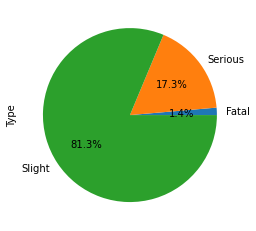

In [85]:
# Plotting a pie chart to show the distribution of the different classes.
trainset.groupby('accident_severity').size().plot(kind='pie', y = "v1",label = "Type",autopct='%1.1f%%')

After checking the values for each class in accident_severity column, we can see that the trainset data is highly unbalanced. Around 81% of the trainset data comprises of Slight severity accidents. Therefore to make the training more effective we will be performing oversampling for the Serious and Fatal types after creating the baseline model.

## 4. Baseline Model

Here we will be using the majority class classifier as a baseline since its a classification problem. We will find out the  most common class label (Mode) in the training set and always output it as a prediction.


In [83]:
# Using value_counts to find the count of different class in accident_severity
trainset["accident_severity"].value_counts()

Slight     50365
Serious    10733
Fatal        848
Name: accident_severity, dtype: int64

In [8]:
# total size of the training set
trainset.shape[0]

61946

The baseline classifier will output "Slight" for all predictions since that is the majority class. We will use macro-averaging here where we will calculate precision, recall and F-score for each class separately and then it will be averaged across all classes.

So when we apply the baseline classifier to all of the training set.

For the "Slight" label, the accuracy measures will be:

    Precision: 50365/61946 = 0.813

    Recall: 50365/50365 = 1.0

    F-score: 2/(1/precision + 1/recall) = 0.896

For the "Serious" label, it will be:

    Precision: 0.0/0.0 = 0.0

    Recall: 0.0/10733 = 0.0

    F-score: 0.0
    
For the "Fatal" label, it will be:

    Precision: 0.0/0.0 = 0.0

    Recall: 0.0/848 = 0.0

    F-score: 0.0

The averages of the 3 classes, i.e. the eventual baseline scores:

    Precision: 0.271

    Recall: 0.333

    F-score: 0.298



### Oversampling of data

Since the target variable is highly unbalanced, it is most likely to impact the performance of our models. Hence to improve the training models, we will be performing oversampling of data here. Oversampling basically means that we will be duplicating samples of data from the minority classes. In the current situation, we will be oversampling for the serious and fatal severity classes.

In [86]:
# Copying the data for different severity classes into a new dataframes
slight_severity=trainset[trainset["accident_severity"]=="Slight"]
serious_severity=trainset[trainset["accident_severity"]=="Serious"]
fatal_severity=trainset[trainset["accident_severity"]=="Fatal"]

In [87]:
# Printing the shape of each new dataframe
print(slight_severity.shape)
print(serious_severity.shape)
print(fatal_severity.shape)

(50365, 21)
(10733, 21)
(848, 21)


For performing oversampling, we will be using resample function from sklearn.utils. We will have to pass the class which we want to upsample and the amount to which we want to upsample as parameters here.
Below, I performed the oversampling for fatal_severity.

In [89]:
# Importing resample function from sklearn and performing upsampling
from sklearn.utils import resample
fatal_severity_upsample = resample(fatal_severity,
             replace=True,
             n_samples=len(slight_severity),
             random_state=42)

# printing the shape of the upsampled dataframe
print(fatal_severity_upsample.shape)

(50365, 21)


Similarly, we will perform upsampling for the serious_severity dataframe as well. We will upsample it to the same level as slight_severity class.

In [90]:
# performing upsampling for serious_severity and them printing the shape of the new dataframe
serious_severity_upsample = resample(serious_severity,
             replace=True,
             n_samples=len(slight_severity),
             random_state=42)

print(serious_severity_upsample.shape)

(50365, 21)


In [91]:
# Printing the shape of the 3 dataframes for each class
print(slight_severity.shape)
print(serious_severity_upsample.shape)
print(fatal_severity_upsample.shape)

(50365, 21)
(50365, 21)
(50365, 21)


In [92]:
# Checking the top 5 rows for the upsampled dataframe
serious_severity_upsample.head()

,accident_severity,age_of_driver,engine_capacity_cc,age_of_vehicle,Male,Other_gender,Hybrid,Petrol,Small town,Urban area,...,Less deprived 20-30%,Less deprived 30-40%,Less deprived 40-50%,More deprived 10-20%,More deprived 20-30%,More deprived 30-40%,More deprived 40-50%,Most deprived 10%,South-east,South-west
41825,Serious,0.000206,-1.004574,-1.640276,0.813304,-0.101283,-0.177254,0.860805,-0.316214,0.507903,...,-0.310466,-0.318494,-0.336683,-0.365524,-0.358937,-0.346379,-0.342890,2.761154,1.040600,-0.391260
4751,Serious,-1.119352,-0.018062,1.774519,0.813304,-0.101283,-0.177254,0.860805,3.162418,-1.968879,...,-0.310466,-0.318494,-0.336683,-0.365524,-0.358937,-0.346379,2.916384,-0.362167,-0.960984,2.555845
30945,Serious,-0.131518,0.006316,-0.312300,-1.229553,-0.101283,-0.177254,-1.161703,3.162418,-1.968879,...,3.220961,-0.318494,-0.336683,-0.365524,-0.358937,-0.346379,-0.342890,-0.362167,-0.960984,2.555845
29819,Serious,0.412127,0.006316,0.256832,-1.229553,-0.101283,-0.177254,0.860805,-0.316214,0.507903,...,-0.310466,-0.318494,-0.336683,-0.365524,-0.358937,-0.346379,-0.342890,2.761154,1.040600,-0.391260
33126,Serious,-1.019897,0.741336,-1.071144,0.813304,-0.101283,-0.177254,-1.161703,-0.316214,0.507903,...,-0.310466,-0.318494,-0.336683,-0.365524,2.786003,-0.346379,-0.342890,-0.362167,1.040600,-0.391260


After performing upsampling, we need to concatenate the 3 dataframes into one new dataframe which will be the upsampled trainset.

In [93]:
# Concatenating using concat function in pandas and then printing the shape
upsampled_trainset=pd.concat([slight_severity,serious_severity_upsample,fatal_severity_upsample])
upsampled_trainset.shape

(151095, 21)

In [94]:
# Checking value counts in the new trainset for the accident_serverity column
print(upsampled_trainset["accident_severity"].value_counts())

Slight     50365
Serious    50365
Fatal      50365
Name: accident_severity, dtype: int64


After performing upsampling we can see that the 3 different classes in accident_severity are now equally distributed. This will help in improving the learning for the model and thus improve the predictions.

<AxesSubplot:ylabel='Type'>

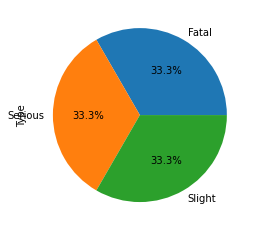

In [95]:
# Plotting a pie chart to show the class distribution for accident_severity
upsampled_trainset.groupby('accident_severity').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [96]:
# Printing the head for the new trainset
upsampled_trainset.head()

,accident_severity,age_of_driver,engine_capacity_cc,age_of_vehicle,Male,Other_gender,Hybrid,Petrol,Small town,Urban area,...,Less deprived 20-30%,Less deprived 30-40%,Less deprived 40-50%,More deprived 10-20%,More deprived 20-30%,More deprived 30-40%,More deprived 40-50%,Most deprived 10%,South-east,South-west
0,Slight,0.412127,0.741336,-0.691722,0.813304,-0.101283,-0.177254,-1.161703,-0.316214,0.507903,...,-0.310466,-0.318494,-0.336683,2.735798,-0.358937,-0.346379,-0.34289,-0.362167,1.040600,-0.39126
1,Slight,1.523121,-1.655100,-0.502011,0.813304,-0.101283,-0.177254,0.860805,-0.316214,0.507903,...,-0.310466,-0.318494,-0.336683,-0.365524,-0.358937,2.887012,-0.34289,-0.362167,1.040600,-0.39126
2,Slight,1.113006,0.006316,1.015675,0.813304,-0.101283,-0.177254,0.860805,-0.316214,0.507903,...,-0.310466,-0.318494,-0.336683,-0.365524,-0.358937,-0.346379,-0.34289,-0.362167,1.040600,-0.39126
4,Slight,-0.200150,-1.655100,-1.640276,-1.229553,-0.101283,-0.177254,0.860805,-0.316214,0.507903,...,-0.310466,-0.318494,-0.336683,-0.365524,-0.358937,-0.346379,-0.34289,-0.362167,1.040600,-0.39126
5,Slight,-0.924344,-1.286085,0.825965,0.813304,-0.101283,-0.177254,0.860805,3.162418,-1.968879,...,-0.310466,-0.318494,-0.336683,-0.365524,-0.358937,-0.346379,-0.34289,-0.362167,-0.960984,-0.39126


In [97]:
# Printing the shape foe the new trainset
upsampled_trainset.shape

(151095, 21)

## 5. Hyperparameter Tuning
Hyperparameter tuning deals with finding the optimum values of the parameters which define the model's performance and the architecture. For example, in decision tree classifier the hyperparameters include the maximum depth of the tree and minimum samples at the leaf node. Depending on the values given, the performance of the model will also vary. Here we will be using Grid search method for hyperparameter tuning where model is build for each possible combination of hyperparameters provided.  

## 6. Training and Testing of models

In [125]:
# Splitting trainset into 2 sets. Xtrain will have all columns except target column whereas Ytrain will only have the target variable
Xtrain = upsampled_trainset.drop("accident_severity", axis=1)

Ytrain = upsampled_trainset["accident_severity"].copy()

In [126]:
# drop labels for testing set, but keep all others
Xtest = testset.drop("accident_severity", axis=1)

Ytest = testset["accident_severity"].copy()

In [127]:
testset.shape

(15482, 21)

## 6.1 Random Forest

### 6.1.1 Training the model

In [128]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=7)

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'n_estimators': [10, 100, 200, 500],
    'max_depth': [5, 15,20],
    'min_samples_split': [5, 10]
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(randomforest, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(Xtrain, Ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 2035.077475309372 seconds


In [129]:
# calling the best estimator in Random forest
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=500,
                       random_state=7)

In [130]:
# Score for the best estimator in Random forest
grid_search.best_score_

0.9191621694998993

The best combination of hyperparameters are max_depth=20, min_samples_split=5, n_estimators=500 which produces a f-score of 0.919. Now lets find the index of the best performing model.

In [131]:
# Best estimator index 
best_model_index = grid_search.cv_results_["rank_test_score"].tolist().index(1)
best_model_index

19

In [132]:
rf_split_test_scores = []
for x in range(5):
    # extract f-score of the best model (index='best_model_index') from each of the 5 splits
    val = grid_search.cv_results_[f"split{x}_test_score"][best_model_index]
    rf_split_test_scores.append(val)

In [133]:
# Creating a dataframe with all the hyperparamters, mean train and test score along with the difference between them
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
19,"{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500}",0.977222,0.919162,5.941305
18,"{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}",0.976676,0.918497,5.956880
17,"{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}",0.975456,0.916598,6.033884
23,"{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 500}",0.959515,0.895929,6.626876
22,"{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}",0.959085,0.894618,6.721716
21,"{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}",0.957405,0.892852,6.742473
16,"{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 10}",0.952876,0.885059,7.117010
20,"{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 10}",0.927774,0.859058,7.406523
11,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 500}",0.887944,0.830698,6.446951
10,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}",0.885712,0.828480,6.461657


We can see that as the maximum depth of the trees increase, the performance of the model improves drastically. We can also note that with max_depth=20, there is a difference of 0.05 in the mean test score between the best and worst models indicating n_estimators and sample split are not influencing the model much. At higher values of max_depth there are indications of slight overfitting. We could improve the model further by regularizing the models with other paramters in Random forest.

In [137]:
# put them into a separate variable for convenience
feature_importances = grid_search.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

age_of_driver: 0.2914679085247302
engine_capacity_cc: 0.2558987496729143
age_of_vehicle: 0.21969944995804175
Petrol: 0.025982863570264393
South-east: 0.022233327057880517
Male: 0.02045849191440497
South-west: 0.01943569636047387
Urban area: 0.01846307164635577
Less deprived 40-50%: 0.013062946741977227
Less deprived 30-40%: 0.012878291900382779
More deprived 20-30%: 0.012397476024305173
More deprived 40-50%: 0.012288442187856755
More deprived 30-40%: 0.01213115543607207
Less deprived 10-20%: 0.011754373085234028
Less deprived 20-30%: 0.011641814318529163
Small town: 0.011526917677517208
More deprived 10-20%: 0.009681649942004045
Most deprived 10%: 0.009399625665674979
Hybrid: 0.006972022975001064
Other_gender: 0.002625725340379809


We can see here that the most important variables of concern are age_of_driver, engine_capacity_cc and age_of_vehicle as they are strong predictors. There is a huge drop-off for the other variables. We can also see that Hybrid cars and other_gender categories are very weak predictors.
We will now save the results to the disk using the dump function from the joblib module.

In [138]:
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(grid_search.best_estimator_, 'models/rf-clf.joblib')

['models/rf-clf.joblib']

### 6.1.2 Testing the model

In [145]:
from joblib import load

best_rf = load("models/rf-clf.joblib")
from sklearn.metrics import precision_recall_fscore_support

# rf
yhat = best_rf.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(Ytest, yhat, average="macro")
print("Random Forest:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Ytest, yhat)))

Random Forest:
Precision: 0.3398124692544488
Recall: 0.338207638046776
F score: 0.33644648902640356

Accuracy: 0.73



Plotting confusion matrix to understand the errors.

In [146]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(Ytest, yhat)
print(confusion_matrix1)
#f = sns.heatmap(cm, annot=True, fmt='d')

[[    4    29   179]
 [   26   322  2338]
 [  135  1427 11022]]


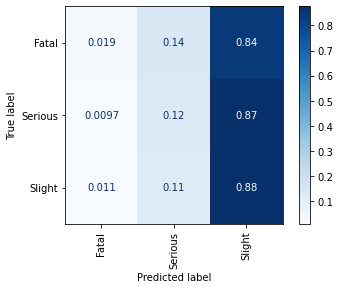

In [147]:
# Plotting confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Ytest, yhat, labels=best_rf.classes_, 
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)

We can see that 88% of Slight severity accidents were predicted correctly. Also 87% of the serious accidents were predicted as slight, which is not great. Similarly 84% of the fatal accidents were predicted as Slight. We can see that the model helps in predicting only slight severity accidents with good accuracy whereas it wrongly predicts fatal and serious accidents as slight.

## 6.2 Linear Support Vector Machine

### 6.2.1 Training the model

In [162]:
from sklearn.svm import LinearSVC

lsvm = LinearSVC(random_state=7, max_iter=5000)

# specify the hyperparameters and their values
# 5 combinations in the grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(lsvm, param_grid, cv=5, scoring='f1_macro', return_train_score=True) 

start = time.time()
grid_search.fit(Xtrain, Ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 3997.427176475525 seconds


In [169]:
grid_search.best_estimator_

LinearSVC(C=0.001, max_iter=5000, random_state=7)

In [170]:
grid_search.best_score_

0.3901311676075999

Here the best f-score produced is 0.39 which is better than the baseline model but less than the RF model.
Now we will display the hyperparameters and the corresponding scores.

In [171]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
0,{'C': 0.001},0.390848,0.390131,0.183457
4,{'C': 10},0.391137,0.389961,0.300582
3,{'C': 1},0.390971,0.389957,0.259529
2,{'C': 0.1},0.390964,0.389937,0.262604
1,{'C': 0.01},0.390938,0.389925,0.259053


There seems to be less difference in the scores between test and train score indicating the hyperparamters are not having much of an influence and the performance remains almost the same. 
Now we will load the results to the disk so that it can be used later.

In [172]:
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(grid_search.best_estimator_, 'models/svm-rbf-clf.joblib')

['models/svm-rbf-clf.joblib']

### 6.2.2 Testing the model

In [173]:
# svm
best_svm = load("models/svm-rbf-clf.joblib")
yhat = best_svm.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(Ytest, yhat, average="macro")
print("SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Ytest, yhat)))

SVM:
Precision: 0.3507557660181882
Recall: 0.39691900176478745
F score: 0.2855312606826163

Accuracy: 0.46



In [174]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(Ytest, yhat)
print(confusion_matrix2)

[[ 108   31   73]
 [1092  423 1171]
 [4233 1759 6592]]


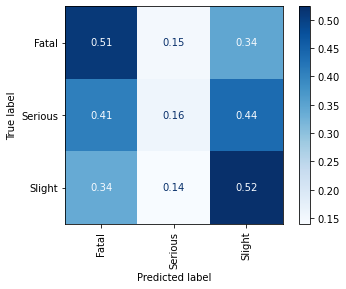

In [175]:
# Plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Ytest, yhat, labels=best_svm.classes_, 
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)

From the confusion matrix we can see that the SVM model performs differently from the RF model. SVM model is better at predicting Fatal accident_severity but less accurate with Slight and serious accident_severity.

## 6.3 Decision Tree Classifier

### 6.3.1 Training the model

In [176]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(random_state=42)

# specify the hyperparameters and their values
# 4 x 2 = 8 combinations in the grid
param_grid = {
    'max_depth': [5, 15,24,25],
    'min_samples_split': [5, 10]
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(decisiontree, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(Xtrain, Ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 41.33636546134949 seconds


In [177]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=25, min_samples_split=5, random_state=42)

In [178]:
grid_search.best_score_

0.8773893391370315

We can see that the best f-score produced for Decision tree classifier model is 0.877 with max_depth=25. This model also outperforms the baseline model.Now let's find the index of the best performing model.

In [158]:
best_model_index = grid_search.cv_results_["rank_test_score"].tolist().index(1)
best_model_index

6

In [179]:
dct_split_test_scores = []
for x in range(5):
    # extract f-score of the best model (index='best_model_index') from each of the 5 splits
    val = grid_search.cv_results_[f"split{x}_test_score"][best_model_index]
    dct_split_test_scores.append(val)

In [180]:
# creating a new dataframe with all the results of hyperparamters and the train test scores
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
6,"{'max_depth': 25, 'min_samples_split': 5}",0.955618,0.877389,8.186142
4,"{'max_depth': 24, 'min_samples_split': 5}",0.945199,0.868537,8.110702
7,"{'max_depth': 25, 'min_samples_split': 10}",0.926860,0.851258,8.156850
5,"{'max_depth': 24, 'min_samples_split': 10}",0.918394,0.844036,8.096526
2,"{'max_depth': 15, 'min_samples_split': 5}",0.712268,0.673310,5.469659
3,"{'max_depth': 15, 'min_samples_split': 10}",0.707352,0.668810,5.448694
0,"{'max_depth': 5, 'min_samples_split': 5}",0.426355,0.423620,0.641592
1,"{'max_depth': 5, 'min_samples_split': 10}",0.426355,0.423620,0.641592


At max_depth=25, the training scores are very high, but there seems to be slight evidence of overfitting with the test scores lower by 8 percentage points at higher depths. Like RF model, the scores improve as the max_depth increases.

In [114]:
# put them into a separate variable for convenience
feature_importances = grid_search.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

age_of_driver: 0.25167739130311295
engine_capacity_cc: 0.24804574319103292
age_of_vehicle: 0.21527341041573347
Male: 0.026896824766144228
South-west: 0.02278431254799285
Less deprived 40-50%: 0.02255637129246099
Petrol: 0.021948261095157223
Less deprived 20-30%: 0.02170194885686284
More deprived 20-30%: 0.021191905025146465
More deprived 40-50%: 0.020203510034277974
More deprived 30-40%: 0.019452146332421098
Less deprived 30-40%: 0.01894491038856283
Less deprived 10-20%: 0.017217253626192072
South-east: 0.015559275066757028
More deprived 10-20%: 0.01421748229075113
Most deprived 10%: 0.012657672296376566
Small town: 0.012398573091620107
Urban area: 0.010229431270341231
Hybrid: 0.004821238135581323
Other_gender: 0.0022223389734745006


We can see here that the most important predictors are age_of_driver,engine_capacity_cc and age_of_vehicle after which there is a massive drop-off in feature importance. Now we will load the results into a disk so that it can be used later.

In [181]:
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(grid_search.best_estimator_, 'models/dct-clf.joblib')

['models/dct-clf.joblib']

### 6.3.2 Testing the model

In [182]:
from joblib import load

best_dct = load("models/dct-clf.joblib")
from sklearn.metrics import precision_recall_fscore_support

# dct
yhat = best_dct.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(Ytest, yhat, average="macro")
print("Decision Tree:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Ytest, yhat)))

Decision Tree:
Precision: 0.3292719989148561
Recall: 0.3271931076641416
F score: 0.3256991240147376

Accuracy: 0.64



In [183]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(Ytest, yhat)
print(confusion_matrix3)

[[   4   50  158]
 [  85  604 1997]
 [ 327 2972 9285]]


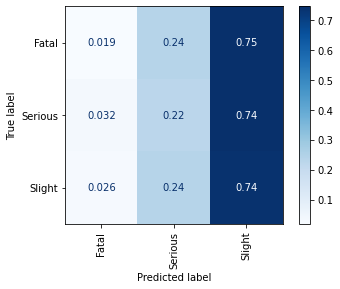

In [184]:
# Plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Ytest, yhat, labels=best_dct.classes_, 
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)

From the confusion matrix we can see that the model can correctly predict 74% of slight accident_severity. Just like random forest, majority of the serious and fatal accident_severity are classified as slight which doesn't help our case. Only 22% of serious accident_severity were predicted as serious. 

## 7. Comparison of models and conclusions

#### Comparison of models:
In terms of Execution Speed: Decision Tree classifier took the least time of 41 seconds followed by Random forest which took ~2000 seconds. SVM took more than ~3600 seconds to run.
<br>In terms of Accuracy: Random forest outperforms both Decision Tree and SVM. Random forest:73% ; SVM: 46% ; Decision Tree classifier: 64% 
<br>In terms of Precision, Recall, F-score: Random forest has better scores compared to SVM and Decision tree.
<br> In both RF and DCT models, the most important predictors are age_of_driver,engine_capacity_cc and age_of_vehicle and the other attributes do not contribute much to the prediction.


#### Conclusions
All the 3 models performs better when we have to predict slight accident_severity accidents. But to have a really good model, we should be able to predict the fatal and serious accident_severity with good accuracy. The current models fails in that aspect. Most of the serious and fatal accident_severity are wrongly predicted as fatal which doesn't help with the car insurance company.
<br> After performing data cleaning and outlier treatments in the group phase, there was only around ~75k rows left for training and testing. That much data was not enough and the quality of data was also not that great which had impacted the performance of the models to a great extent.

## 8.1 Possible future improvements

1) Training and testing the model on 2019 and 2021 data might help us build a better model since it might have more data compared to 2020 because of Covid pandemic and lockdowns. 
<br> 2) To improve the performance of models, there is need for good quality data which will help to train the models even better.
<br> 3) There were only 3 predictors which mainly influenced the target variable. Feature engineering can be done in a even more effective way to come up with new predictors which have good correlation with accident_severity.
<br> 4) Having a more diverse and balanced data can help build a relatively better model.
<br> 5) We can try looking at the accident data for a different country and see which factors influence the most and come up with similar features and improve the model.

## 8.2 Real World Implementation of the models

As the models efficiency is not good in predicting serious and fatal accident_severity, it can be used for identfying and predicting the chances of slight accident_severity cases with better accuracy. For implementing it in real world, a lot of improvement in terms of amount and quality of data along with performance is required.

## Word Count

In [199]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [200]:
import io
from nbformat import read, NO_CONVERT

with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = read(f, NO_CONVERT)

word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 1737
